# Opioid Addiction Project
## Notebook 07: Testing

This notebook tests the execution code with multiple inputs, looking for areas where the code either technically fails (won't run at all) or practically fails (produces nonsensical outputs).

### W210, Capstone
Summer 2019

Team:  Cameron Kennedy, Aditi Khullar, Rachel Kramer, Sharad Varadarajan

# 0. Load Libraries and Set Global Variables
This analysis is performed in the cells below.

In [1]:
#Import Required Libraries
import pandas as pd
import random

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

#Custom data prep function used in both training and prediction 
import OpioidExecution as oe

#Set initial parameter(s)
pd.set_option('display.max_rows', 200)
pd.options.display.max_columns = 150
dataDir = './data/'

print('Pandas Version', pd.__version__)

Pandas Version 0.24.1


# 1. Generate Multiple Input Scenarios

## 1.1 Toy Example of Dictionary Parsing

Here we build a tiny example of looping through every option of dictionary values for multiple keys, while choosing random values for other keys.

In [2]:
#Build a test dictionary
testDict = {'A':[1,2,3,4,5],
            'B':['a','b','c'],
            'C':[6,7,8,9,10]
           }
testDict

{'A': [1, 2, 3, 4, 5], 'B': ['a', 'b', 'c'], 'C': [6, 7, 8, 9, 10]}

In [3]:
'''Loop through test dict, select each value once, 
while picking random values for non selected keys.
'''
inputDict = dict()

for k in testDict:
    for item in testDict[k]:
        print(k, item, ' | ', end='')
        
        for k2 in testDict:
            if k2 == k:  #Intentionally pick the item in the loop
                inputDict[k2] = item
            else:  #Pick a random item
                inputDict[k2] = random.choice(testDict[k2])
                
        print(inputDict)

A 1  | {'A': 1, 'B': 'c', 'C': 8}
A 2  | {'A': 2, 'B': 'c', 'C': 8}
A 3  | {'A': 3, 'B': 'a', 'C': 6}
A 4  | {'A': 4, 'B': 'c', 'C': 9}
A 5  | {'A': 5, 'B': 'b', 'C': 9}
B a  | {'A': 2, 'B': 'a', 'C': 8}
B b  | {'A': 2, 'B': 'b', 'C': 7}
B c  | {'A': 4, 'B': 'c', 'C': 10}
C 6  | {'A': 1, 'B': 'b', 'C': 6}
C 7  | {'A': 1, 'B': 'b', 'C': 7}
C 8  | {'A': 3, 'B': 'c', 'C': 8}
C 9  | {'A': 5, 'B': 'c', 'C': 9}
C 10  | {'A': 2, 'B': 'a', 'C': 10}


## 1.2 Apply Toy Example to Dictionary of Possible Values

In [4]:
#Create dictionary of possible values
allChoicesDict = {'NAME':['Test Scripter'],
                  'IRSEX':[1,2],
                  'EDUHIGHCAT':[1,2,3,4,5],
                  'AGE2':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],
                  'IRALCRC':[1,2,3,9],
                  'IRALCFY':[991,993,1,12,50,100,300],
                  'CABINGEVR':[991,2,1],
                  'IRALCAGE':[991,14,17,20,21,100],
                  'TXYRRECVD2':[0,1],
                  'TXEVRRCVD2':[0,1],
                  'IRCIGRC':[9,1,2,3,4],
                  #'CIGDLYMO':[91,2,1],
                  'CIGAGE':[991,994,999,10,13,15,17,18,19,20,22,25,30,40,50,99],
                  'TOBYR':[0,1],
                  'FUCIG18':[2,1],
                  'IRMJRC':[9,1,2,3],
                  'IRMJFY':[991,993,1,2,3,7,10,20,30,40,50,100,200,300,365],
                  'FUMJ18':[2,1],
                  'IRCOCRC':[9,1,2,3],
                  'IRCRKRC':[9,1,2,3],
                  'IRHERRC':[9,1,2,3],
                  'IRHALLUCREC':[9,1,2,3],
                  'IRLSDRC':[9,1,2,3],
                  'IRECSTMOREC':[9,1,2,3],
                  'IRINHALREC':[9,1,2,3],
                  'IRMETHAMREC':[9,1,2,3],
                  'ADDPREV':[1,2,94],
                  'ADDSCEV':[1,2,94,99],
                  'BOOKED':[1,2,94,97],
                 }

allChoicesDict

{'NAME': ['Test Scripter'],
 'IRSEX': [1, 2],
 'EDUHIGHCAT': [1, 2, 3, 4, 5],
 'AGE2': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 'IRALCRC': [1, 2, 3, 9],
 'IRALCFY': [991, 993, 1, 12, 50, 100, 300],
 'CABINGEVR': [991, 2, 1],
 'IRALCAGE': [991, 14, 17, 20, 21, 100],
 'TXYRRECVD2': [0, 1],
 'TXEVRRCVD2': [0, 1],
 'IRCIGRC': [9, 1, 2, 3, 4],
 'CIGAGE': [991, 994, 999, 10, 13, 15, 17, 18, 19, 20, 22, 25, 30, 40, 50, 99],
 'TOBYR': [0, 1],
 'FUCIG18': [2, 1],
 'IRMJRC': [9, 1, 2, 3],
 'IRMJFY': [991, 993, 1, 2, 3, 7, 10, 20, 30, 40, 50, 100, 200, 300, 365],
 'FUMJ18': [2, 1],
 'IRCOCRC': [9, 1, 2, 3],
 'IRCRKRC': [9, 1, 2, 3],
 'IRHERRC': [9, 1, 2, 3],
 'IRHALLUCREC': [9, 1, 2, 3],
 'IRLSDRC': [9, 1, 2, 3],
 'IRECSTMOREC': [9, 1, 2, 3],
 'IRINHALREC': [9, 1, 2, 3],
 'IRMETHAMREC': [9, 1, 2, 3],
 'ADDPREV': [1, 2, 94],
 'ADDSCEV': [1, 2, 94, 99],
 'BOOKED': [1, 2, 94, 97]}

In [5]:
#Now generate all combinations for our full dictionary
inputDict = dict()
numTests = 0

for k in allChoicesDict:
    for item in allChoicesDict[k]:
        print(k, item, ' | ', end='')
        
        for k2 in allChoicesDict:
            if k2 == k:  #Intentionally pick the item in the loop
                inputDict[k2] = item
            else:  #Pick a random item
                inputDict[k2] = random.choice(allChoicesDict[k2])
                
        numTests+=1
        print(inputDict,'\n')
        
print('Total Test Cases:', numTests)

NAME Test Scripter  | {'NAME': 'Test Scripter', 'IRSEX': 1, 'EDUHIGHCAT': 3, 'AGE2': 3, 'IRALCRC': 2, 'IRALCFY': 100, 'CABINGEVR': 1, 'IRALCAGE': 17, 'TXYRRECVD2': 0, 'TXEVRRCVD2': 1, 'IRCIGRC': 1, 'CIGAGE': 25, 'TOBYR': 1, 'FUCIG18': 2, 'IRMJRC': 3, 'IRMJFY': 1, 'FUMJ18': 2, 'IRCOCRC': 1, 'IRCRKRC': 1, 'IRHERRC': 1, 'IRHALLUCREC': 2, 'IRLSDRC': 3, 'IRECSTMOREC': 1, 'IRINHALREC': 9, 'IRMETHAMREC': 9, 'ADDPREV': 94, 'ADDSCEV': 94, 'BOOKED': 97} 

IRSEX 1  | {'NAME': 'Test Scripter', 'IRSEX': 1, 'EDUHIGHCAT': 1, 'AGE2': 15, 'IRALCRC': 9, 'IRALCFY': 1, 'CABINGEVR': 2, 'IRALCAGE': 991, 'TXYRRECVD2': 0, 'TXEVRRCVD2': 1, 'IRCIGRC': 1, 'CIGAGE': 17, 'TOBYR': 1, 'FUCIG18': 2, 'IRMJRC': 1, 'IRMJFY': 991, 'FUMJ18': 1, 'IRCOCRC': 2, 'IRCRKRC': 2, 'IRHERRC': 2, 'IRHALLUCREC': 1, 'IRLSDRC': 1, 'IRECSTMOREC': 2, 'IRINHALREC': 3, 'IRMETHAMREC': 9, 'ADDPREV': 2, 'ADDSCEV': 1, 'BOOKED': 1} 

IRSEX 2  | {'NAME': 'Test Scripter', 'IRSEX': 2, 'EDUHIGHCAT': 1, 'AGE2': 15, 'IRALCRC': 9, 'IRALCFY': 50, 'CABI

# 2. Run Tests

In [6]:
#Run tests!

verbose = 1

inputDict = dict()
dfTestResults = pd.DataFrame()
numTests = 0

for k in allChoicesDict:
    for item in allChoicesDict[k]:
        if verbose >= 1:
            print('TEST',numTests, ' | ', k, '=', item)
        
        for k2 in allChoicesDict:
            if k2 == k:  #Intentionally pick the item in the loop
                inputDict[k2] = item
            else:  #Pick a random item
                inputDict[k2] = random.choice(allChoicesDict[k2])
        
        #Run Test!
        predProb, predPercentile, predFI = oe.generateReport(inputDict)  #This one line "does all the work"
        
        #Rename dictionary keys in output (to prevent duplicates of input names)
        keyList = [k3 for k3 in predFI]
        for k3 in keyList:
            predFI[k3+'_Shap'] = predFI.pop(k3)
        
        #Convert list items back to nonlist items (it converts to a list in oe.generateReport)
        for k4 in inputDict:
            inputDict[k4] = inputDict[k4][0]
        
        #Print Output
        if verbose >= 2:
            print('Input:', inputDict)
            print('Predicted Probability: {:.3%}'.format(predProb))
            print('Percentile of Predicted Probability: {:.3%}'.format(predPercentile))
        if verbose >= 3:
            print('Feature Importance (sorted low to high):', predFI)
        
        outDict = {**{'TestCase':numTests,'predProb':predProb, 'predPercentile':predPercentile},
                   **inputDict, 
                   **predFI
                  }
        #{**dictA, **dictB, **dictC, etc.} is a handy (and pythonic!) way to merge dicts
        
        #Add test results to dataframe
        dfTestResults = dfTestResults.append(outDict, ignore_index=True)
        
        if verbose >= 4:
            print(dfTestResults)
        
        numTests+=1
        
print('Total Test Cases:', numTests)

TEST 0  |  NAME = Test Scripter


C:\Users\camke\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_re

TEST 1  |  IRSEX = 1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.90s/it]


TEST 2  |  IRSEX = 2


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.59s/it]


TEST 3  |  EDUHIGHCAT = 1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.57s/it]


TEST 4  |  EDUHIGHCAT = 2


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.52s/it]


TEST 5  |  EDUHIGHCAT = 3


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.68s/it]


TEST 6  |  EDUHIGHCAT = 4


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.49s/it]


TEST 7  |  EDUHIGHCAT = 5


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.44s/it]


TEST 8  |  AGE2 = 1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.46s/it]


TEST 9  |  AGE2 = 2


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.52s/it]


TEST 10  |  AGE2 = 3


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.54s/it]


TEST 11  |  AGE2 = 4


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.57s/it]


TEST 12  |  AGE2 = 5


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.50s/it]


TEST 13  |  AGE2 = 6


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.06s/it]


TEST 14  |  AGE2 = 7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.71s/it]


TEST 15  |  AGE2 = 8


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.55s/it]


TEST 16  |  AGE2 = 9


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.80s/it]


TEST 17  |  AGE2 = 10


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.69s/it]


TEST 18  |  AGE2 = 11


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.60s/it]


TEST 19  |  AGE2 = 12


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.49s/it]


TEST 20  |  AGE2 = 13


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.56s/it]


TEST 21  |  AGE2 = 14


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.55s/it]


TEST 22  |  AGE2 = 15


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.60s/it]


TEST 23  |  AGE2 = 16


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.63s/it]


TEST 24  |  AGE2 = 17


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.59s/it]


TEST 25  |  IRALCRC = 1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.54s/it]


TEST 26  |  IRALCRC = 2


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.59s/it]


TEST 27  |  IRALCRC = 3


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.56s/it]


TEST 28  |  IRALCRC = 9


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.22s/it]


TEST 29  |  IRALCFY = 991


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.97s/it]


TEST 30  |  IRALCFY = 993


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.72s/it]


TEST 31  |  IRALCFY = 1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.53s/it]


TEST 32  |  IRALCFY = 12


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.71s/it]


TEST 33  |  IRALCFY = 50


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.74s/it]


TEST 34  |  IRALCFY = 100


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.64s/it]


TEST 35  |  IRALCFY = 300


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.70s/it]


TEST 36  |  CABINGEVR = 991


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.78s/it]


TEST 37  |  CABINGEVR = 2


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:08<00:00,  8.28s/it]


TEST 38  |  CABINGEVR = 1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:07<00:00,  7.00s/it]


TEST 39  |  IRALCAGE = 991


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.68s/it]


TEST 40  |  IRALCAGE = 14


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.56s/it]


TEST 41  |  IRALCAGE = 17


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.85s/it]


TEST 42  |  IRALCAGE = 20


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.72s/it]


TEST 43  |  IRALCAGE = 21


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.68s/it]


TEST 44  |  IRALCAGE = 100


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.62s/it]


TEST 45  |  TXYRRECVD2 = 0


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.81s/it]


TEST 46  |  TXYRRECVD2 = 1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:07<00:00,  7.72s/it]


TEST 47  |  TXEVRRCVD2 = 0


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.52s/it]


TEST 48  |  TXEVRRCVD2 = 1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.54s/it]


TEST 49  |  IRCIGRC = 9


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.75s/it]


TEST 50  |  IRCIGRC = 1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.81s/it]


TEST 51  |  IRCIGRC = 2


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.61s/it]


TEST 52  |  IRCIGRC = 3


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.77s/it]


TEST 53  |  IRCIGRC = 4


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.65s/it]


TEST 54  |  CIGAGE = 991


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.59s/it]


TEST 55  |  CIGAGE = 994


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.54s/it]


TEST 56  |  CIGAGE = 999


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.57s/it]


TEST 57  |  CIGAGE = 10


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.01s/it]


TEST 58  |  CIGAGE = 13


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.76s/it]


TEST 59  |  CIGAGE = 15


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.62s/it]


TEST 60  |  CIGAGE = 17


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.65s/it]


TEST 61  |  CIGAGE = 18


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.77s/it]


TEST 62  |  CIGAGE = 19


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.59s/it]


TEST 63  |  CIGAGE = 20


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.71s/it]


TEST 64  |  CIGAGE = 22


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.60s/it]


TEST 65  |  CIGAGE = 25


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.60s/it]


TEST 66  |  CIGAGE = 30


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.74s/it]


TEST 67  |  CIGAGE = 40


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.67s/it]


TEST 68  |  CIGAGE = 50


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.76s/it]


TEST 69  |  CIGAGE = 99


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.71s/it]


TEST 70  |  TOBYR = 0


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.96s/it]


TEST 71  |  TOBYR = 1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.75s/it]


TEST 72  |  FUCIG18 = 2


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.84s/it]


TEST 73  |  FUCIG18 = 1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.69s/it]


TEST 74  |  IRMJRC = 9


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.64s/it]


TEST 75  |  IRMJRC = 1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.71s/it]


TEST 76  |  IRMJRC = 2


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.63s/it]


TEST 77  |  IRMJRC = 3


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.68s/it]


TEST 78  |  IRMJFY = 991


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.57s/it]


TEST 79  |  IRMJFY = 993


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.61s/it]


TEST 80  |  IRMJFY = 1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.57s/it]


TEST 81  |  IRMJFY = 2


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.45s/it]


TEST 82  |  IRMJFY = 3


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.13s/it]


TEST 83  |  IRMJFY = 7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.64s/it]


TEST 84  |  IRMJFY = 10


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.65s/it]


TEST 85  |  IRMJFY = 20


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.56s/it]


TEST 86  |  IRMJFY = 30


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.45s/it]


TEST 87  |  IRMJFY = 40


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.45s/it]


TEST 88  |  IRMJFY = 50


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.54s/it]


TEST 89  |  IRMJFY = 100


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.59s/it]


TEST 90  |  IRMJFY = 200


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.64s/it]


TEST 91  |  IRMJFY = 300


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.52s/it]


TEST 92  |  IRMJFY = 365


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.52s/it]


TEST 93  |  FUMJ18 = 2


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.47s/it]


TEST 94  |  FUMJ18 = 1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.66s/it]


TEST 95  |  IRCOCRC = 9


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.55s/it]


TEST 96  |  IRCOCRC = 1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.53s/it]


TEST 97  |  IRCOCRC = 2


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.56s/it]


TEST 98  |  IRCOCRC = 3


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.53s/it]


TEST 99  |  IRCRKRC = 9


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.51s/it]


TEST 100  |  IRCRKRC = 1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.62s/it]


TEST 101  |  IRCRKRC = 2


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.48s/it]


TEST 102  |  IRCRKRC = 3


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.52s/it]


TEST 103  |  IRHERRC = 9


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.63s/it]


TEST 104  |  IRHERRC = 1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.70s/it]


TEST 105  |  IRHERRC = 2


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.40s/it]


TEST 106  |  IRHERRC = 3


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.70s/it]


TEST 107  |  IRHALLUCREC = 9


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.95s/it]


TEST 108  |  IRHALLUCREC = 1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.58s/it]


TEST 109  |  IRHALLUCREC = 2


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.54s/it]


TEST 110  |  IRHALLUCREC = 3


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.53s/it]


TEST 111  |  IRLSDRC = 9


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.47s/it]


TEST 112  |  IRLSDRC = 1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.57s/it]


TEST 113  |  IRLSDRC = 2


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.59s/it]


TEST 114  |  IRLSDRC = 3


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.54s/it]


TEST 115  |  IRECSTMOREC = 9


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.49s/it]


TEST 116  |  IRECSTMOREC = 1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.56s/it]


TEST 117  |  IRECSTMOREC = 2


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.48s/it]


TEST 118  |  IRECSTMOREC = 3


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.63s/it]


TEST 119  |  IRINHALREC = 9


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.52s/it]


TEST 120  |  IRINHALREC = 1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.56s/it]


TEST 121  |  IRINHALREC = 2


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.49s/it]


TEST 122  |  IRINHALREC = 3


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.56s/it]


TEST 123  |  IRMETHAMREC = 9


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.48s/it]


TEST 124  |  IRMETHAMREC = 1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.50s/it]


TEST 125  |  IRMETHAMREC = 2


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.59s/it]


TEST 126  |  IRMETHAMREC = 3


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.47s/it]


TEST 127  |  ADDPREV = 1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.56s/it]


TEST 128  |  ADDPREV = 2


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.61s/it]


TEST 129  |  ADDPREV = 94


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.58s/it]


TEST 130  |  ADDSCEV = 1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.61s/it]


TEST 131  |  ADDSCEV = 2


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.89s/it]


TEST 132  |  ADDSCEV = 94


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.97s/it]


TEST 133  |  ADDSCEV = 99


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.71s/it]


TEST 134  |  BOOKED = 1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.52s/it]


TEST 135  |  BOOKED = 2


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.61s/it]


TEST 136  |  BOOKED = 94


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.64s/it]


TEST 137  |  BOOKED = 97


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\lib\site-packages\shap\explainers\kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.56s/it]


Total Test Cases: 138


In [7]:
#Convert data types (float to int)
for k in inputDict:
    if k != 'NAME':
        dfTestResults[k] = dfTestResults[k].astype(int)
        
dfTestResults

,ADDPREV,ADDPREV_Shap,ADDSCEV,ADDSCEV_Shap,AGE2,AGE2_Shap,BOOKED,BOOKED_Shap,CABINGEVR,CABINGEVR_Shap,CIGAGE,CIGAGE_Shap,EDUHIGHCAT,EDUHIGHCAT_Shap,FUCIG18,FUCIG18_Shap,FUMJ18,FUMJ18_Shap,IRALCAGE,IRALCAGE_Shap,IRALCFY,IRALCFY_Shap,IRALCRC,IRALCRC_Shap,IRCIGRC,IRCIGRC_Shap,IRCOCRC,IRCOCRC_Shap,IRCRKRC,IRCRKRC_Shap,IRECSTMOREC,IRECSTMOREC_Shap,IRHALLUCREC,IRHALLUCREC_Shap,IRHERRC,IRHERRC_Shap,IRINHALREC,IRINHALREC_Shap,IRLSDRC,IRLSDRC_Shap,IRMETHAMREC,IRMETHAMREC_Shap,IRMJFY,IRMJFY_Shap,IRMJRC,IRMJRC_Shap,IRSEX,IRSEX_Shap,NAME,TOBYR,TOBYR_Shap,TXEVRRCVD2,TXEVRRCVD2_Shap,TXYRRECVD2,TXYRRECVD2_Shap,TestCase,predPercentile,predProb
0,94,0.029696,99,0.011308,15,0.005368,97,-0.028431,2,-0.043088,13,0.008163,5,0.012157,1,0.000000,2,-0.020065,21,-0.033716,991,0.000000,2,0.020780,4,-0.035707,2,0.027524,3,-0.025942,2,0.082686,1,0.041816,3,0.228024,2,0.105097,9,0.000000,1,0.049299,50,0.004842,1,0.019261,1,0.000000,Test Scripter,0,-0.030718,1,0.041091,1,0.083948,0.0,0.980635,0.718384
1,1,0.008397,99,0.007348,13,0.019154,1,0.005568,1,0.005556,994,0.000000,3,-0.020283,1,0.000000,1,0.017591,100,-0.078939,100,-0.016345,2,-0.024604,2,-0.011433,1,0.107550,9,0.000000,2,0.083583,2,0.049186,2,0.229327,9,0.000000,9,0.005665,9,0.004304,200,0.000000,3,-0.035819,1,0.000000,Test Scripter,1,0.000000,1,0.028086,1,0.066032,1.0,0.964143,0.614918
2,94,0.031707,99,0.006359,5,-0.011868,1,0.001741,1,-0.001937,40,-0.003188,5,0.003890,1,0.000000,2,-0.039752,14,0.005367,993,-0.002127,9,-0.010109,3,-0.024896,9,-0.012578,1,0.002942,9,-0.006912,3,-0.004451,9,-0.002783,9,-0.016494,3,0.016603,9,-0.002460,2,0.000000,9,-0.009821,2,-0.004650,Test Scripter,1,-0.013521,1,0.018852,1,0.024300,2.0,0.535982,0.109206
3,2,0.000000,99,0.012369,9,0.070270,94,0.013434,991,0.005495,17,0.000000,1,0.000000,2,0.000000,1,0.084244,21,-0.054768,50,0.000000,9,0.000000,4,-0.039677,3,0.094486,3,0.000000,2,0.047007,3,0.045537,1,0.202999,3,0.048931,2,0.004971,1,0.062480,991,-0.000295,9,0.009025,1,0.022935,Test Scripter,1,0.005234,0,0.000000,1,0.050940,3.0,0.996502,0.850609
4,94,0.034724,99,0.005952,1,0.008961,1,0.023056,1,0.000000,22,0.019672,2,0.000000,2,0.000000,1,0.036944,991,0.007213,993,0.000000,3,-0.021986,2,0.003197,9,-0.024113,3,-0.012596,1,0.056557,3,-0.026664,1,0.154339,1,0.136231,3,0.000000,2,0.069234,7,-0.016520,1,0.024325,1,0.000000,Test Scripter,0,-0.020476,0,0.000000,0,0.000000,4.0,0.965517,0.623041
5,94,0.018755,99,0.000000,16,-0.104990,97,-0.003975,991,0.000000,15,0.006435,3,0.000000,2,0.006244,2,0.000000,20,0.000000,100,0.014572,3,0.008449,4,0.000000,9,-0.019506,1,0.013145,3,0.082100,3,0.034063,3,0.188807,3,0.043635,2,0.002110,2,0.086091,100,0.060659,3,-0.015437,1,0.000000,Test Scripter,1,0.021069,0,0.000000,0,0.000000,5.0,0.962644,0.607219
6,2,0.000000,94,0.008052,5,0.067611,1,0.026827,2,-0.027805,17,-0.016879,4,-0.013845,2,0.000000,1,0.083920,100,-0.083202,300,0.041354,2,0.000000,1,0.000000,9,0.000000,2,0.000000,3,0.006236,3,0.027045,1,0.196467,9,0.000000,2,0.010329,2,0.049164,993,0.000000,1,0.034873,1,0.026390,Test Scripter,1,0.017973,1,0.026309,0,0.000000,6.0,0.968391,0.645812
7,2,0.000000,99,0.007792,4,0.083898,1,0.023670,991,0.005668,22,0.026893,5,0.000000,1,0.006074,1,0.106611,21,0.017551,1,0.002134,1,0.000000,3,0.016334,1,0.059570,2,0.002894,3,0.032121,9,0.000000,3,0.088252,1,0.049883,3,0.024053,3,0.038477,50,0.022452,2,0.028637,1,0.000000,Test Scripter,1,0.012743,0,0.000000,0,0.000000,7.0,0.993503,0.820700
8,94,0.028133,99,0.026102,1,0.120604,97,-0.038745,991,0.009663,20,0.000000,5,0.007022,2,-0.008664,2,-0.024260,20,-0.038286,993,-0.006554,3,0.002496,9,-0.005019,9,-0.000350,3,0.000000,3,0.033471,9,-0.015428,9,0.000000,1,0.136651,3,0.000000,3,-0.013227,30,0.017708,3,-0.029536,2,0.000000,Test Scripter,1,0.006208,1,0.052394,0,0.000000,8.0,0.928536,0.425376
9,1,0.007012,2,-0.028753,2,0.000000,97,0.000000,991,0.000000,18,0.008812,2,0.026685,2,0.000000,1,0.042217,14,0.032237,300,0.055835,2,-0.026399,3,-0.049598,3,0.020412,1,0.014246,2,0.069941,2,0.026878,1,0.193339,1,0.06

In [8]:
#Save test results to file
dfTestResults.to_csv(dataDir+'testResults.csv')

# 3. Explore Test Results

IRSEX


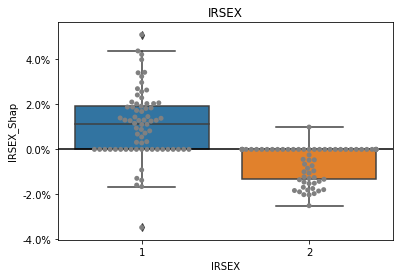

EDUHIGHCAT


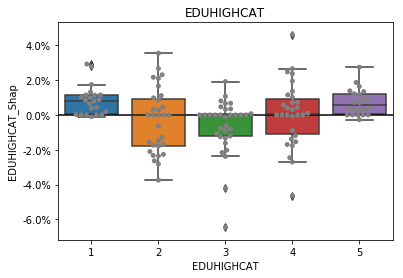

AGE2


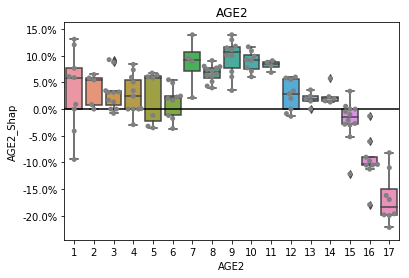

IRALCRC


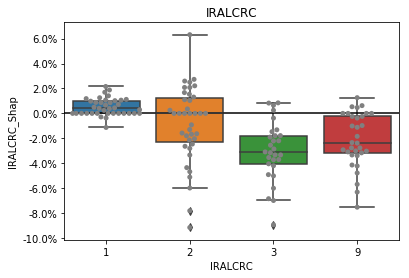

IRALCFY


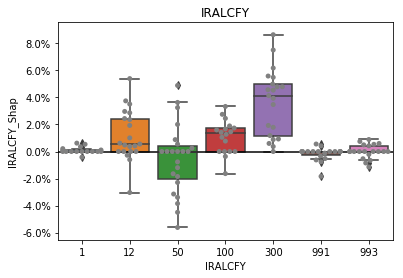

CABINGEVR


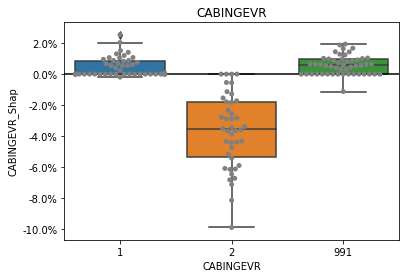

IRALCAGE


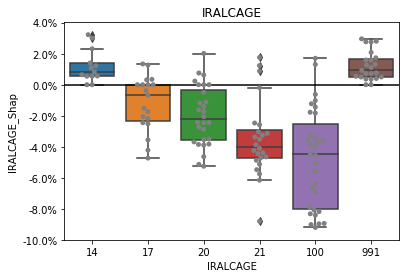

TXYRRECVD2


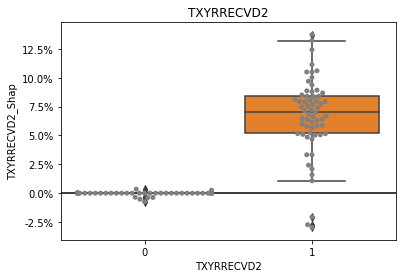

TXEVRRCVD2


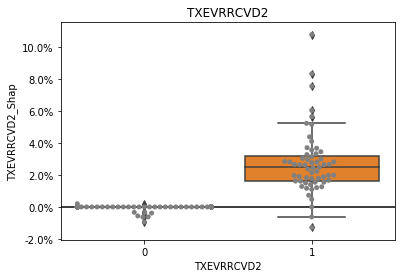

IRCIGRC


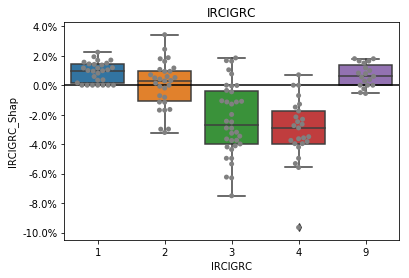

CIGAGE


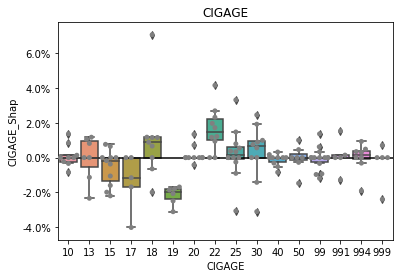

TOBYR


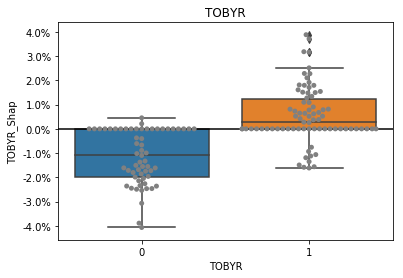

FUCIG18


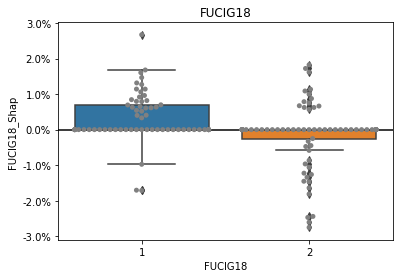

IRMJRC


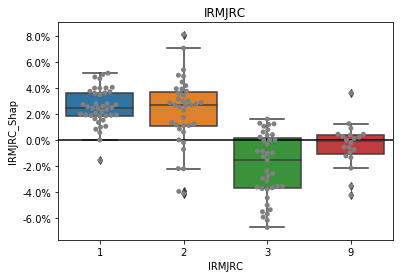

IRMJFY


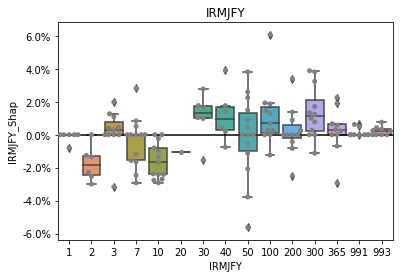

FUMJ18


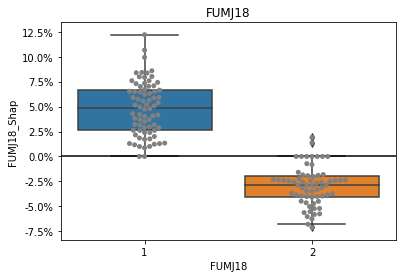

IRCOCRC


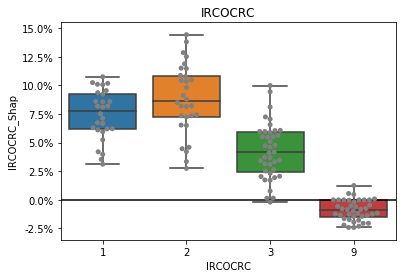

IRCRKRC


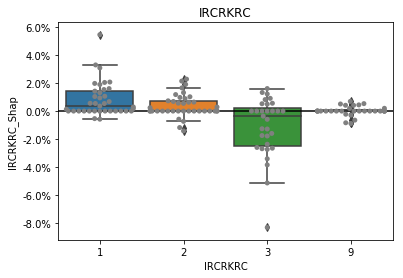

IRHERRC


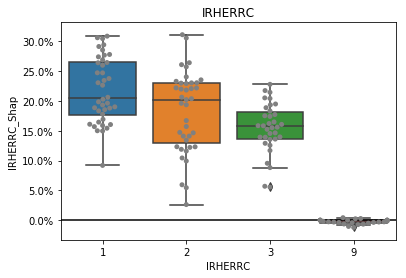

IRHALLUCREC


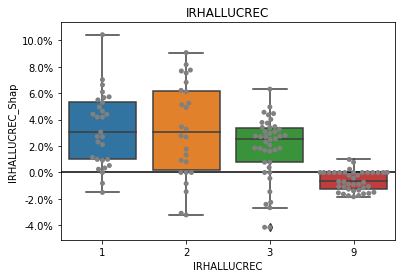

IRLSDRC


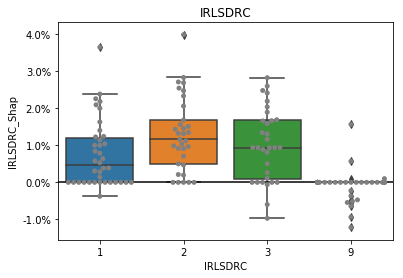

IRECSTMOREC


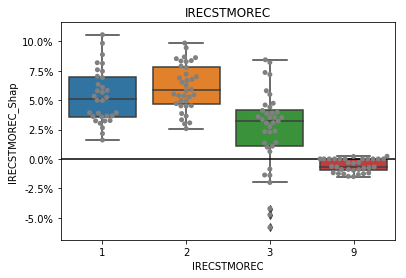

IRINHALREC


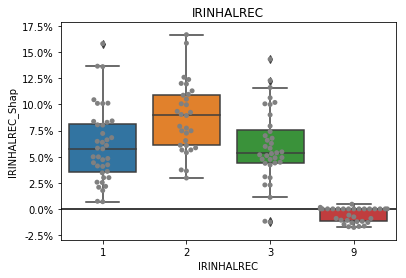

IRMETHAMREC


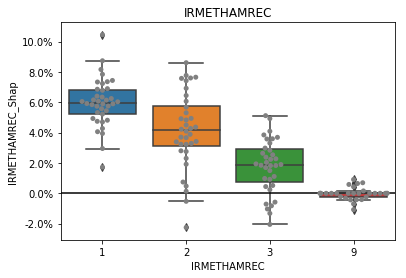

ADDPREV


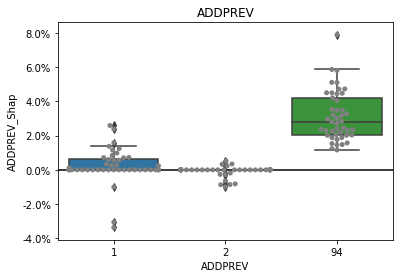

ADDSCEV


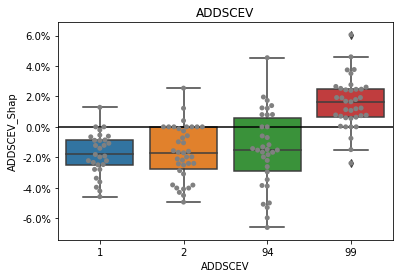

BOOKED


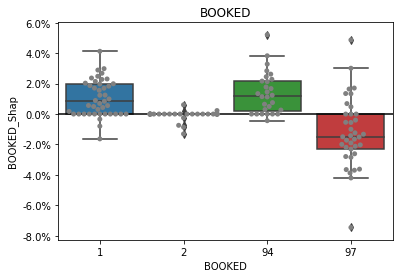

In [9]:
for k in inputDict:
    if k != 'NAME':
        plt.figure() #Createes a new figure
        print(k)
        ax = sns.boxplot(x=k, y=k+'_Shap', data=dfTestResults).set_title(k)
        ax = sns.swarmplot(x=k, y=k+'_Shap', data=dfTestResults, color='gray')
        ax.axhline(0, ls='-', color='black') #Horizontal line
        vals = ax.get_yticks()
        ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
        plt.show()

# Appendix: Other Code, Function Testing, Etc.

In [10]:
#Testing creating dataframe from dictionary
a = {'predProb': 0.3271889400921659, 'predPercentile': 0.8793103448275862, 'NAME': 'Test Scripter'}
b = {'predProb': 0.3271889400921659, 'predPercentile': 0.8793103448275862, 'NAME': 'Test Scripter', 'IRSEX': 1, 'EDUHIGHCAT': 2, 'AGE2': 13, 'IRALCRC': 1, 'IRALCFY': 100, 'CABINGEVR': 1, 'IRALCAGE': 991, 'TXYRRECVD2': 1, 'TXEVRRCVD2': 1, 'IRCIGRC': 3, 'CIGDLYMO': 2, 'CIGAGE': 30, 'TOBYR': 1, 'FUCIG18': 2, 'IRMJRC': 9, 'IRMJFY': 1, 'FUMJ18': 2, 'IRCOCRC': 9, 'IRCRKRC': 2, 'IRHERRC': 3, 'IRHALLUCREC': 9, 'IRLSDRC': 1, 'IRECSTMOREC': 1, 'IRINHALREC': 3, 'IRMETHAMREC': 2, 'ADDPREV': 2, 'ADDSCEV': 2, 'BOOKED': 2, 'IRCIGRC_Shap': -0.07299654091300585, 'ADDSCEV_Shap': -0.06865909213385069, 'CIGAGE_Shap': -0.05574356218385848, 'IRCRKRC_Shap': -0.04934079270700638, 'IRLSDRC_Shap': -0.04646291598195351, 'IRMJRC_Shap': -0.0200648067591507, 'TOBYR_Shap': -0.015489018333968665, 'FUCIG18_Shap': -0.01138623521782741, 'IRCOCRC_Shap': -0.010061910431149564, 'FUMJ18_Shap': -0.009741800963022434, 'IRHALLUCREC_Shap': -0.008625047228143813, 'IRMJFY_Shap': -0.004902287641520897, 'CIGDLYMO_Shap': 0.0, 'TXEVRRCVD2_Shap': 0.0, 'BOOKED_Shap': 0.0024776782586973176, 'CABINGEVR_Shap': 0.00685966595368058, 'EDUHIGHCAT_Shap': 0.014366252833132368, 'IRALCRC_Shap': 0.014641349875946778, 'IRSEX_Shap': 0.015423509266007558, 'IRALCAGE_Shap': 0.017224785647449774, 'AGE2_Shap': 0.02299620739872297, 'ADDPREV_Shap': 0.028591442326717936, 'IRALCFY_Shap': 0.036158901226165434, 'IRINHALREC_Shap': 0.04385787814223628, 'IRECSTMOREC_Shap': 0.055529423394040836, 'IRHERRC_Shap': 0.07470339366460665, 'TXYRRECVD2_Shap': 0.07821903891985728, 'IRMETHAMREC_Shap': 0.12716643169159556}
c = {'predProb': 0.3271889400921659, 'predPercentile': 0.8793103448275862, 'NAME': 'Test Scripter', 'IRSEX': 1, 'EDUHIGHCAT': 2, 'AGE2': 13, 'IRALCRC': 1, 'IRALCFY': 100, 'CABINGEVR': 1, 'IRALCAGE': 991, 'TXYRRECVD2': 1, 'TXEVRRCVD2': 1, 'IRCIGRC': 3, 'CIGDLYMO': 2, 'CIGAGE': 30, 'TOBYR': 1, 'FUCIG18': 2, 'IRMJRC': 9, 'IRMJFY': 1, 'FUMJ18': 2, 'IRCOCRC': 9, 'IRCRKRC': 2, 'IRHERRC': 3, 'IRHALLUCREC': 9, 'IRLSDRC': 1, 'IRECSTMOREC': 1, 'IRINHALREC': 3, 'IRMETHAMREC': 2, 'ADDPREV': 2, 'ADDSCEV': 2, 'BOOKED': 2, 'IRCIGRC_Shap': -0.07299654091300585, 'ADDSCEV_Shap': -0.06865909213385069, 'CIGAGE_Shap': -0.05574356218385848, 'IRCRKRC_Shap': -0.04934079270700638, 'IRLSDRC_Shap': -0.04646291598195351, 'IRMJRC_Shap': -0.0200648067591507, 'TOBYR_Shap': -0.015489018333968665, 'FUCIG18_Shap': -0.01138623521782741, 'IRCOCRC_Shap': -0.010061910431149564, 'FUMJ18_Shap': -0.009741800963022434, 'IRHALLUCREC_Shap': -0.008625047228143813, 'IRMJFY_Shap': -0.004902287641520897, 'CIGDLYMO_Shap': 0.0, 'TXEVRRCVD2_Shap': 0.0, 'BOOKED_Shap': 0.0024776782586973176, 'CABINGEVR_Shap': 0.00685966595368058, 'EDUHIGHCAT_Shap': 0.014366252833132368, 'IRALCRC_Shap': 0.014641349875946778, 'IRSEX_Shap': 0.015423509266007558, 'IRALCAGE_Shap': 0.017224785647449774, 'AGE2_Shap': 0.02299620739872297, 'ADDPREV_Shap': 0.028591442326717936, 'IRALCFY_Shap': 0.036158901226165434, 'IRINHALREC_Shap': 0.04385787814223628, 'IRECSTMOREC_Shap': 0.055529423394040836, 'IRHERRC_Shap': 0.07470339366460665, 'TXYRRECVD2_Shap': 0.07821903891985728, 'IRMETHAMREC_Shap': 0.12716643169159556}

# for k in a:
#     a[k] = [k]

df = pd.DataFrame()
df = df.append(a, ignore_index=True)
df = df.append(b, ignore_index=True)
df

,NAME,predPercentile,predProb,ADDPREV,ADDPREV_Shap,ADDSCEV,ADDSCEV_Shap,AGE2,AGE2_Shap,BOOKED,BOOKED_Shap,CABINGEVR,CABINGEVR_Shap,CIGAGE,CIGAGE_Shap,CIGDLYMO,CIGDLYMO_Shap,EDUHIGHCAT,EDUHIGHCAT_Shap,FUCIG18,FUCIG18_Shap,FUMJ18,FUMJ18_Shap,IRALCAGE,IRALCAGE_Shap,IRALCFY,IRALCFY_Shap,IRALCRC,IRALCRC_Shap,IRCIGRC,IRCIGRC_Shap,IRCOCRC,IRCOCRC_Shap,IRCRKRC,IRCRKRC_Shap,IRECSTMOREC,IRECSTMOREC_Shap,IRHALLUCREC,IRHALLUCREC_Shap,IRHERRC,IRHERRC_Shap,IRINHALREC,IRINHALREC_Shap,IRLSDRC,IRLSDRC_Shap,IRMETHAMREC,IRMETHAMREC_Shap,IRMJFY,IRMJFY_Shap,IRMJRC,IRMJRC_Shap,IRSEX,IRSEX_Shap,TOBYR,TOBYR_Shap,TXEVRRCVD2,TXEVRRCVD2_Shap,TXYRRECVD2,TXYRRECVD2_Shap
0,Test Scripter,0.87931,0.327189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Test Scripter,0.87931,0.327189,2.0,0.028591,2.0,-0.068659,13.0,0.022996,2.0,0.002478,1.0,0.00686,30.0,-0.055744,2.0,0.0,2.0,0.014366,2.0,-0.011386,2.0,-0.009742,991.0,0.017225,100.0,0.036159,1.0,0.014641,3.0,-0.072997,9.0,-0.010062,2.0,-0.049341,1.0,0.055529,9.0,-0.008625,3.0,0.074703,3.0,0.043858,1.0,-0.046463,2.0,0.127166,1.0,-0.004902,9.0,-0.020065,1.0,0.015424,1.0,-0.015489,1.0,0.0,1.0,0.078219


In [11]:
#This was used for early testing
limChoicesDict = {'NAME':['Test Scripter'],
                  'IRSEX':[1,],
                  'EDUHIGHCAT':[3],
                  'AGE2':[10],
                  'IRALCRC':[1],
                  'IRALCFY':[12],
                  'CABINGEVR':[2],
                  'IRALCAGE':[17],
                  'TXYRRECVD2':[1],
                  'TXEVRRCVD2':[0],
                  'IRCIGRC':[2],
                  'CIGDLYMO':[91],
                  'CIGAGE':[18],
                  'TOBYR':[0],
                  'FUCIG18':[1],
                  'IRMJRC':[3],
                  'IRMJFY':[40],
                  'FUMJ18':[2],
                  'IRCOCRC':[1],
                  'IRCRKRC':[1],
                  'IRHERRC':[1],
                  'IRHALLUCREC':[2],
                  'IRLSDRC':[2],
                  'IRECSTMOREC':[3],
                  'IRINHALREC':[3],
                  'IRMETHAMREC':[2],
                  'ADDPREV':[1],
                  'ADDSCEV':[1],
                  'BOOKED':[1],
                 }

limChoicesDict

{'NAME': ['Test Scripter'],
 'IRSEX': [1],
 'EDUHIGHCAT': [3],
 'AGE2': [10],
 'IRALCRC': [1],
 'IRALCFY': [12],
 'CABINGEVR': [2],
 'IRALCAGE': [17],
 'TXYRRECVD2': [1],
 'TXEVRRCVD2': [0],
 'IRCIGRC': [2],
 'CIGDLYMO': [91],
 'CIGAGE': [18],
 'TOBYR': [0],
 'FUCIG18': [1],
 'IRMJRC': [3],
 'IRMJFY': [40],
 'FUMJ18': [2],
 'IRCOCRC': [1],
 'IRCRKRC': [1],
 'IRHERRC': [1],
 'IRHALLUCREC': [2],
 'IRLSDRC': [2],
 'IRECSTMOREC': [3],
 'IRINHALREC': [3],
 'IRMETHAMREC': [2],
 'ADDPREV': [1],
 'ADDSCEV': [1],
 'BOOKED': [1]}

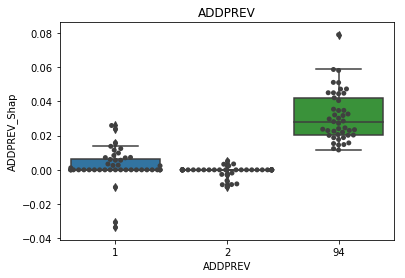

In [12]:
#Test plot
ax = sns.boxplot(x="ADDPREV", y="ADDPREV_Shap", data=dfTestResults).set_title('ADDPREV')
ax = sns.swarmplot(x="ADDPREV", y="ADDPREV_Shap", data=dfTestResults, color=".25")